### See src.py, test.py files for algorithm code

In [14]:
import src
import test
import matplotlib.pyplot as plt

# Let's test algorithm
See test.py

In [15]:
import unittest
suite = unittest.TestLoader().loadTestsFromTestCase(test.Tests)
unittest.TextTestRunner(verbosity=2).run(suite)

test_strings_overlap (test.Tests) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Example of usage

In [16]:
strings = ['cde', 'abc', 'eab', 'fgh', 'ghf', 'hed']
algo = src.superstring4(strings)
print('superstring4: ' + str(algo.solve()))
print ('greedy:       ' + \
       str(src.greedy_min_max_contain_string(strings)))
print ('answer:       ' + \
       str(src.min_max_contain_string(set(strings)))) 
                        #input must be set of strings

superstring4: cdeabcfghfhed
greedy:       fghfhedcdeabc
answer:       ghfghedcdeabc


In [17]:
from itertools import combinations
from itertools import combinations_with_replacement
from itertools import permutations
from itertools import product

def short_string_test(n_words, words):
    for c in combinations(words, n_words):
        l1 = len(src.greedy_min_max_contain_string(c))
        l2 = len(src.min_max_contain_string(set(c)))
        res.append((1.0 *l1) / l2)
    return res

# Let's "make sure" that aproximation ratio is equal 2 for short strings(a.r.>=2)
It takes some time to find right answers

In [18]:
letters = 'abcd'
tmp = [map(''.join, product(letters, repeat=length))\
        for length in range(1, 4)]
words = [x for n in tmp for x in n]
res = []
sst = short_string_test(3, words)
print(max(sst))

1.4


For sentences with two words, where words consist of $1, 2, 3$ letters aproximation ratio is ~<= 1.5

Let's implement test described in: 
http://www.mimuw.edu.pl/~mucha/teaching/aa2008/ss.pdf (2.2 The greedy algorithm)

In [19]:
def generate_worst_test(k):
    return ['a' + 'b' * k, 'b' * k + 'c', 'b' * (k + 1)]
test = generate_worst_test(4)
res = list()
for c in [generate_worst_test(i) for i in range(4, 300)]:
    l1 = src.greedy_min_max_contain_string(c)
    l2 = src.min_max_contain_string(set(c))
    res.append(((1.0 *len(l1)) / len(l2)))
print (max(res))

1.990066225165563


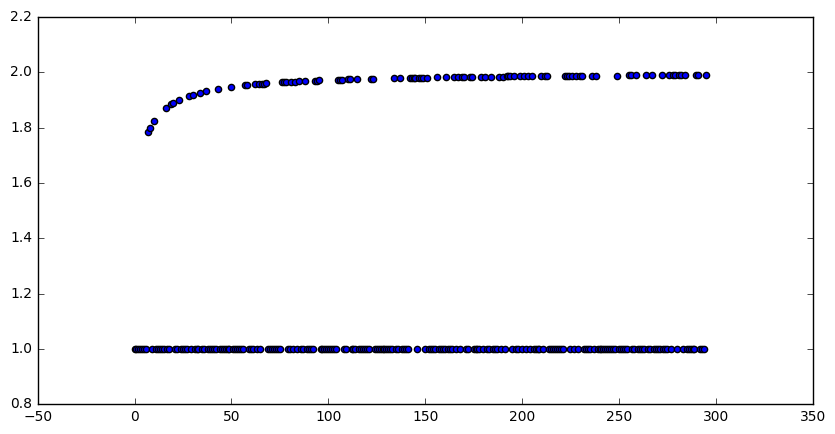

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(res)), res)
plt.show()

So we can see on  $\{ab^k,b^kc,b^{k+1}\}$ tests algorithm's aproximation ratio converges to 2. We have a little bit better algorighm than in article(in article assumes that strings can not contain each other) that merges strings in one, if one contains another

# Testing graph algorithm

In [21]:
test = generate_worst_test(4)
res = list()
for c in [generate_worst_test(i) for i in range(4, 300)]:
    algo = src.superstring4(c)
    l1 = algo.solve()
    l2 = src.min_max_contain_string(set(c))
    res.append(((1.0 *len(l1)) / len(l2)))
print (max(res))

1.990066225165563


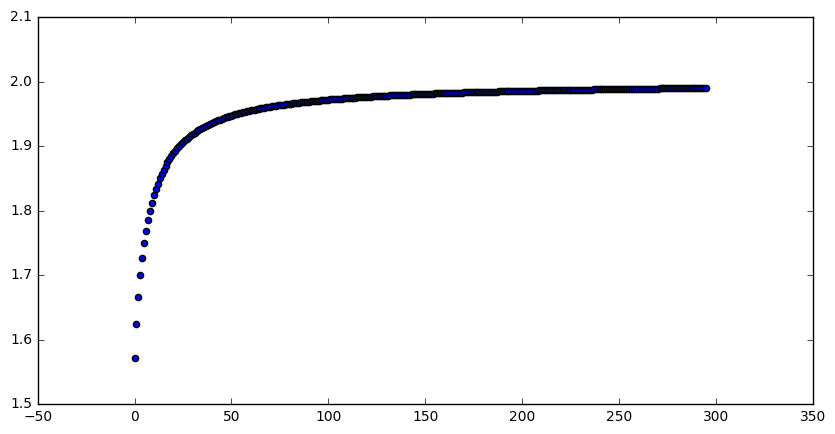

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(res)), res)
plt.show()

Small strings tests

In [23]:
letters = 'abcd'
tmp = [map(''.join, product(letters, repeat=length))\
        for length in range(1, 4)]
words = [x for n in tmp for x in n]
res = []
for c in combinations(words, 3):
        algo = src.superstring4(c)
        l1 = len(algo.solve())
        l2 = len(src.min_max_contain_string(set(c)))
        res.append((1.0 *l1) / l2)
print(max(res))

1.6666666666666667


Worse than greedy

In [45]:
res = []
a = ""
b = ""
c = ""
d = ""
e = ""
f = ""
for k in range(100):
    tst = []
    a = a + "a"
    b = b + "b"
    c = c + "c"
    d = d + "d"
    e = e + "e"
    f = f + "f"
    x = "x"
    tst.append(a + x + b)
    tst.append(b + x + c)
    tst.append(c + x + d)
    tst.append(d + x + e)
    tst.append(e + x + f)
    tst.append(b[:-1] + x + a + x)
    tst.append(c[:-1] + x + b + x)
    tst.append(d[:-1] + x + c + x)
    tst.append(e[:-1] + x + d + x)
    tst.append(f[:-1] + x + e + x)
    algo = src.superstring4(tst)
#     print(tst)
#     algo = src.superstring4(tst)
    l1 = len(algo.solve())
#     print (algo.solve())
    l2 = 9 * k + 1
#     l2 = len(src.min_max_contain_string(set(tst)))
    res.append((1.0 * l1) / l2)

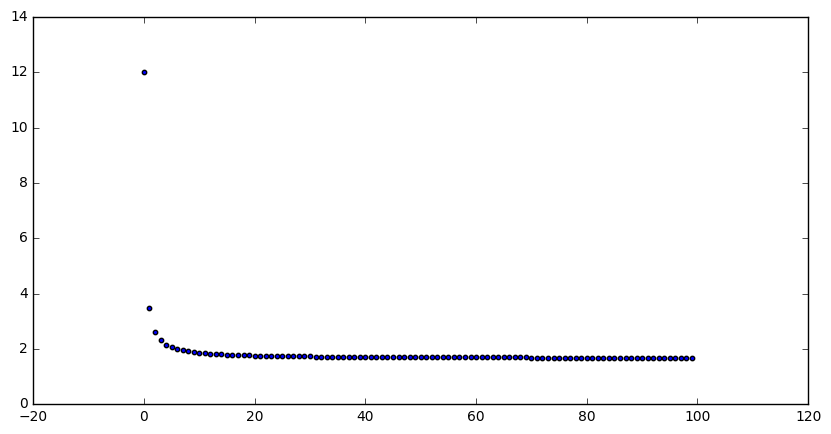

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(res)), res, s=10)
# plt.ylim((0, 5))
plt.show()

### DOT GRAPH

In [26]:
strings2 = ['abc', 'bcd', 'daa', 'bcc']
for i_id, i in enumerate(strings2):
    print ("v" + str(i_id) +" [shape=box, label=\"" + i + "\"]")
for i_id, i in enumerate(strings2):
    for j_id, j in enumerate(strings2):
        print ("v" + str(i_id) + "->" + "v" + str(j_id) + " [label=\""+ str(src.strings_overlap(i, j)) + "\"]")

v0 [shape=box, label="abc"]
v1 [shape=box, label="bcd"]
v2 [shape=box, label="daa"]
v3 [shape=box, label="bcc"]
v0->v0 [label="3"]
v0->v1 [label="2"]
v0->v2 [label="0"]
v0->v3 [label="2"]
v1->v0 [label="0"]
v1->v1 [label="3"]
v1->v2 [label="1"]
v1->v3 [label="0"]
v2->v0 [label="1"]
v2->v1 [label="0"]
v2->v2 [label="3"]
v2->v3 [label="0"]
v3->v0 [label="0"]
v3->v1 [label="0"]
v3->v2 [label="0"]
v3->v3 [label="3"]
